In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intelligenza artificiale/data/car.data')
df

#per leggere un file exel si usa .read_exel 
#(per leggere solo un foglio specifico di exel si usa es: pd.read_excel('sample.xlsx', sheet_name=1))
#per leggere un file json si usa .read_json


#nel caso in cui i nomi delle colonne sono riportate come prima riga del dataframe (capita con i file exel)
#si usa ,skiprows = 1 (si mette dopo il percorso del file)

,buying,maint,doors,persons,lug_boot,safety,none
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
#per droppare le colonne che non servono bisogna usare .drop
#es : dfpulito = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis = 1) 

#invece per droppare le righe conteneti NaN si utilizza dropna
#esempio : new_df = df.dropna()

#invece per eliminare i duplicate si utilizza drop_duplicates
#esempio df.drop_duplicates(inplace = True)
#tips:se vuoi controllare se ci sono duplicati utilizza print(df.duplicated())

In [ ]:
#.replace per sostituire i valori 

df['buying'] = df['buying'].replace('low',0)
df['buying'] = df['buying'].replace('med',1)
df['buying'] = df['buying'].replace('high',2)
df['buying'] = df['buying'].replace('vhigh',3)

df['maint'] = df['maint'].replace('low',0)
df['maint'] = df['maint'].replace('med',1)
df['maint'] = df['maint'].replace('high',2)
df['maint'] = df['maint'].replace('vhigh',3)

df['doors'] = df['doors'].replace('2',2)
df['doors'] = df['doors'].replace('3',4)
df['doors'] = df['doors'].replace('4',4)
df['doors'] = df['doors'].replace('5more',5)

df['persons'] = df['persons'].replace('more',5)
df['persons'] = df['persons'].replace('2',2)
df['persons'] = df['persons'].replace('4',4)

df['lug_boot'] = df['lug_boot'].replace('small',0)
df['lug_boot'] = df['lug_boot'].replace('med',1)
df['lug_boot'] = df['lug_boot'].replace('big',2)

df['safety'] = df['safety'].replace('low',0)
df['safety'] = df['safety'].replace('med',1)
df['safety'] = df['safety'].replace('high',2)

df['none'] = df['none'].replace('unacc',0)
df['none'] = df['none'].replace('acc',1)
df['none'] = df['none'].replace('good',2)
df['none'] = df['none'].replace('vgood',3)

In [ ]:
#invece si  hanno solo 2 valori  (esempio maschi e femmine) che bisogna trasformare in numero si usa questa sintassi
#df['Sex'] = df['Sex'].replace('male',1)


In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,none
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


In [ ]:
result = df.dtypes
result

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
none        int64
dtype: object

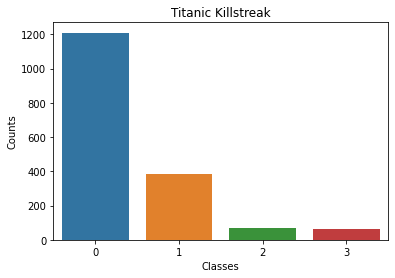

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="none", data=df)
plt.title("Titanic Killstreak")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

In [ ]:
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,:-1] #prende tutti i valori delle righe tranne l'ultimo quindi none / prende tutti i valori delle varie colonne tranne l'ultima quindi none
y=dfnp[:,-1] #prende solo tutti i valori dell'ultima colonna

#x=df[:,1:] per prendere tutto dalla seconda colonna in poi
#y=df[:,0] prende solo la prima colonna

import collections
collections.Counter(y)

Counter({0: 1210, 1: 384, 3: 65, 2: 69})

In [ ]:
dfnp

array([[3, 3, 2, ..., 0, 0, 0],
       [3, 3, 2, ..., 0, 1, 0],
       [3, 3, 2, ..., 0, 2, 0],
       ...,
       [0, 0, 5, ..., 2, 0, 0],
       [0, 0, 5, ..., 2, 1, 2],
       [0, 0, 5, ..., 2, 2, 3]])

In [ ]:
y

array([0, 0, 0, ..., 0, 2, 3])

In [ ]:
x

array([[3, 3, 2, 2, 0, 0],
       [3, 3, 2, 2, 0, 1],
       [3, 3, 2, 2, 0, 2],
       ...,
       [0, 0, 5, 5, 2, 0],
       [0, 0, 5, 5, 2, 1],
       [0, 0, 5, 5, 2, 2]])

In [ ]:
!pip install sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%  #quindi usera il 30% di y per fare i test
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=5) #determina quanti vicini andrà a prendere
neigh.fit(X_train, y_train) 

predict = neigh.predict(X_test) 


print(f'dati predetti dal metodo =                {predict[:10]}') 
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') 

dati predetti dal metodo =                [0 2 0 0 2 0 0 0 3 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


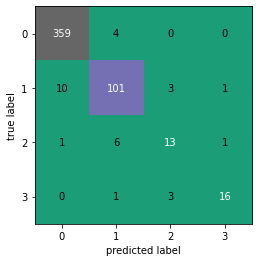

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       0.90      0.88      0.89       115
           2       0.68      0.62      0.65        21
           3       0.89      0.80      0.84        20

    accuracy                           0.94       519
   macro avg       0.86      0.82      0.84       519
weighted avg       0.94      0.94      0.94       519



In [ ]:
print(accuracy_score(y_test, predict))

0.9421965317919075


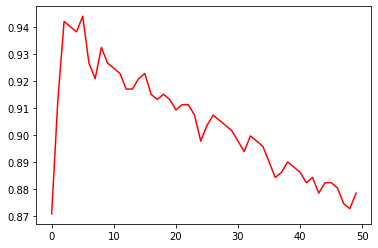

In [ ]:
#questa parte serve per trovare un knn ottimale 
#quindi fa un for con tutti i num dispari e ne fa fare il trainer e il test e in base all'accuracy ci fa un grafico

import matplotlib.pyplot as plt
import numpy as np
lista = []
for i in range(1,100,2):
  neigh = KNeighborsClassifier(n_neighbors=i) 
  neigh.fit(X_train, y_train) 
  predict = neigh.predict(X_test)
  a = accuracy_score(y_test, predict)
  lista.append(a)


plt.plot(lista, color = 'r')
plt.show()

# Decision Tree

In [ ]:
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 2 0 1 2 0 0 0 2 1]
dati reali presenti nel dataset di test = [0 3 0 0 1 0 0 0 3 1]


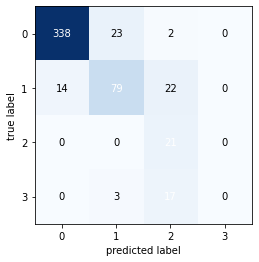

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'none']
['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']


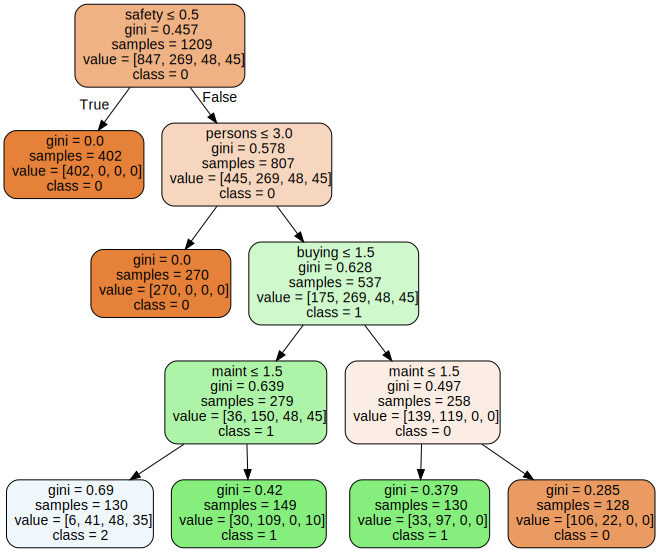

In [ ]:
features=list(df.columns.values)
print(features)
print(features[0:-1])
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1], #vi sono tutte le colonne tranne quella della variabile dipendente 
                     class_names=['0','1','2','3'],  #attento qua che devi mettere tutti i valori possibili che ci sono nella variabile dipendete (none) 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('Money')
graph



In [ ]:
from sklearn.tree import export_text
r = export_text(tree_clf, feature_names=features[0:-1])
print(r)

|--- safety <= 0.50
|   |--- class: 0
|--- safety >  0.50
|   |--- persons <= 3.00
|   |   |--- class: 0
|   |--- persons >  3.00
|   |   |--- buying <= 1.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- class: 2
|   |   |   |--- maint >  1.50
|   |   |   |   |--- class: 1
|   |   |--- buying >  1.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- maint >  1.50
|   |   |   |   |--- class: 0



In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       363
           1       0.75      0.69      0.72       115
           2       0.34      1.00      0.51        21
           3       0.00      0.00      0.00        20

    accuracy                           0.84       519
   macro avg       0.51      0.65      0.54       519
weighted avg       0.85      0.84      0.84       519



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
